In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
from pyemma.util.contexts import settings

In [5]:
# Define structure and path files
structure_file = "MouseCysGSSG.pdb"
topology_file = "MouseCysGSSG.prmtop"
trajectory_file = "MouseCysGSSG.md1.nc"

# Load the trajectory into PyEMMA
feat = pyemma.coordinates.featurizer(structure_file)
feat.add_all()
inp = pyemma.coordinates.source(trajectory_file, features=feat)

# Check the load of the trajectory
print(f"Estructura cargada desde: {structure_file}")
print(f"Trayectoria cargada desde: {trajectory_file}")

# Load the trajectory into PyEMMA
files = [trajectory_file]
pdb = structure_file


Estructura cargada desde: MouseCysGSSG.pdb
Trayectoria cargada desde: MouseCysGSSG.md1.nc


In [6]:
# Calculate skeletal torsion characteristics
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ['backbone\ntorsions']

# Calculate positions of skeleton atoms
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_selection(positions_feat.select_Backbone())
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ['backbone atom\npositions']

# Calculate distances of atoms from the skeleton
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ['backbone atom\ndistances']

100%|██████████| 12/12 [01:24<00:00,  7.02s/it]                                 


In [28]:
# Check the dimension of the data
print("Dimensión de torsions_data:", torsions_data.shape[1])
print("Dimensión de positions_data:", positions_data.shape[1])
print("Dimensión de distances_data:", distances_data.shape[1])

Dimensión de torsions_data: 752
Dimensión de positions_data: 1701
Dimensión de distances_data: 160085


In [29]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score."""
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


In [30]:
# Adjust dimensions based on the actual dimensions of the data
dim_torsions = min(5, torsions_data.shape[1])
dim_positions = min(5, positions_data.shape[1])
dim_distances = min(5, distances_data.shape[1])

print(f"Dimensión utilizada para torsions_data: {dim_torsions}")
print(f"Dimensión utilizada para positions_data: {dim_positions}")
print(f"Dimensión utilizada para distances_data: {dim_distances}")


Dimensión utilizada para torsions_data: 5
Dimensión utilizada para positions_data: 5
Dimensión utilizada para distances_data: 5


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roa

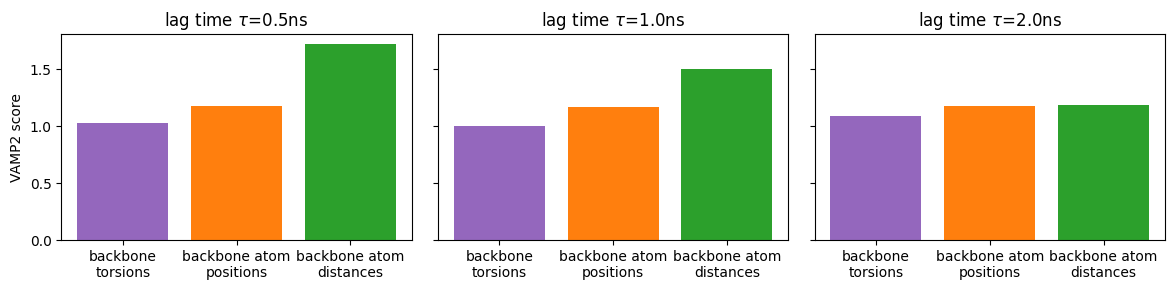

In [38]:
dim = 1

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20]):
    torsions_scores = score_cv(torsions_data, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    positions_scores = score_cv(positions_data, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(distances_data, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C4', 'C1', 'C2'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
axes[0].set_ylabel('VAMP2 score')
fig.tight_layout()

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roa

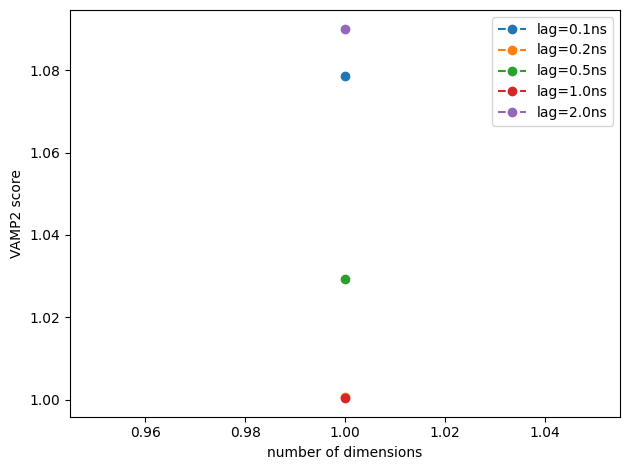

In [43]:
lags = [1, 2, 5, 10, 20]
dims = [i + 1 for i in range(1)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(torsions_data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()